#random seed for -> تثبيت ترتيب التقسيمة

#os.makedirs(folder, exist_ok=True) -> تُنشئ مجلد إذا لم تكن هناك مجلدات في السلسلة،إذا كان المجلد موجودًا بالفعل فلن يُعطي البرنامج خطأ

#os.walk -> traves on folders and files

root: المسار الحالي للمجلد الذي يتم زيارته.
dirs: قائمة بالمجلدات الفرعية داخل المجلد الحالي.
files: قائمة بالملفات داخل المجلد الحالي.

#os.path.basename(root) يتم استخراج اسم المجلد الحالي (آخر جزء في المسار) باستخدام (class name)

#root,f[1] -> extract the path and second item(extention)

#extend هي طريقة تُستخدم لإضافة عناصر متعددة إلى نهاية قائمة موجودة،لا تُرجع قيمة، بل تعدل القائمة مباشرة.

#zip(): يربط كل عنصر من القائمة image_files مع العنصر المقابل في القائمة class_names في شكل أزواج (tuples).

#zip(*combined): يُفك ضغط ال(tuples) ويعيد قائمتين منفصلتين:الأولى تحتوي على أسماء الصور باث& الثانية تحتوي على التصنيفات

#os.remove(dst_path) يقوم بحذف الملف أو الرابط الرمزي الموجود في dst_path (اختصارً) قبل إنشاء الرابط الرمزي الجديد.

#os.path.abspath -> path start with (home)

In [ ]:
import os
import random

def split_dataset(source_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42):
    """
    Splits a dataset into train, validation, and test sets and prints a summary.

    Parameters:
    - source_folder: Path to the root folder containing the dataset
    - train_ratio: Proportion of data to use for training (default: 0.7)
    - val_ratio: Proportion of data to use for validation (default: 0.15)
    - test_ratio: Proportion of data to use for testing (default: 0.15)
    - random_seed: Random seed for reproducibility (default: 42)
    
    Returns:
    A tuple containing:
      - A dictionary with keys 'train', 'val', 'test' and their respective paths.
      - A list of class names.
    """
    # Set random seed for reproducibility
    random.seed(random_seed)
    
    # Create output directories
    output_folders = ['train', 'val', 'test']
    for folder in output_folders:
        os.makedirs(folder, exist_ok=True)
    
    # Walk through the directory to find image files
    image_files = []
    class_names = []
    
    for root, dirs, files in os.walk(source_folder):
        if not files:
            continue
        
        # Determine class name (last directory in the path)
        class_name = os.path.basename(root)
        
        # Skip if the directory is an output directory
        if class_name in output_folders:
            continue
        
        # Find image files (common image extensions)
        image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'}
        class_images = [
            os.path.join(root, f) 
            for f in files 
            if os.path.splitext(f.lower())[1] in image_extensions
        ]
        
        if class_images:
            image_files.extend(class_images)
            class_names.extend([class_name] * len(class_images))
    
    if not image_files:
        raise ValueError("No image files found in the source directory")
    
    # Combine and shuffle
    combined = list(zip(image_files, class_names))
    random.shuffle(combined)
    image_files, class_names = zip(*combined)
    
    # Calculate split indices
    total_files = len(image_files)
    train_split = int(total_files * train_ratio)
    val_split = train_split + int(total_files * val_ratio)
    
    # Create split subdirectories for each class
    unique_classes = sorted(set(class_names))
    for split in output_folders:
        for cls in unique_classes:
            os.makedirs(os.path.join(split, cls), exist_ok=True)
    
    # Split and create symbolic links
    splits = [
        ('train', range(0, train_split)),
        ('val', range(train_split, val_split)),
        ('test', range(val_split, total_files))
    ]
    split_counts = {split: {cls: 0 for cls in unique_classes} for split in output_folders}
    
    #split name is group name(train,val,test)
    for split_name, indices in splits:
        for idx in indices:
            src_path = image_files[idx]
            cls = class_names[idx]
            filename = os.path.basename(src_path)
            dst_path = os.path.join(split_name, cls, filename)
            
            if os.path.exists(dst_path):
                os.remove(dst_path)
            os.symlink(os.path.abspath(src_path), dst_path)
            
            split_counts[split_name][cls] += 1
    
    # Print summary
    print("Dataset split completed!\n")
    for split in output_folders:
        print(f"{split.capitalize()} dataset:")
        for cls, count in split_counts[split].items():
            print(f"  {cls}: {count} files")
        print()
    
    # Return the paths to the split directories and class names
    return {split: os.path.abspath(split) for split in output_folders}, unique_classes

dataset_paths, classes = split_dataset('/kaggle/input/multi-class-knee-osteoporosis-x-ray-dataset')


print("Dataset split paths:", dataset_paths)
print("Classes:", classes)


Dataset split completed!

Train dataset:
  Normal: 544 files
  Osteopenia: 256 files
  Osteoporosis: 562 files

Val dataset:
  Normal: 111 files
  Osteopenia: 59 files
  Osteoporosis: 122 files

Test dataset:
  Normal: 125 files
  Osteopenia: 59 files
  Osteoporosis: 109 files

Dataset split paths: {'train': '/kaggle/working/train', 'val': '/kaggle/working/val', 'test': '/kaggle/working/test'}
Classes: ['Normal', 'Osteopenia', 'Osteoporosis']


#rm هو أمر سطر أوامر في أنظمة Unix/Linux لحذف الملفات أو المجلدات

#Affine transformation(10) refers to randomly rotate images between -10 to +10 degrees.

#zero_division=0 يقوم بتعيين قيمة صفر بدلاً من حدوث خطأ أو NaN في حالة القسمة على صفر.

#model.train -> their is some operations work in just train state like dropout and batch norm

#step() -> updata weights

#loss.item() converts the value of the loss from a Tensor to a regular numeric value (like a float) that can be easily handled.

#تحويل الـ tensor إلى NumPy array هو لتسهيل استخدامه مع مكتبات أخرى مثل Scikit-learn أو Matplotlib التي تحتاج البيانات بتنسيق NumPy.

#size(0) تُرجع حجم البُعد الأول، والذي يمثل عادةً عدد العينات في الدفعة (batch).

#إذا قمت بحفظ النموذج بالكامل باستخدام torch.save(model, PATH)، فإن torch.load(PATH) سيقوم بتحميل النموذج مع هيكلته ووزنه.

#weights فقط باستخدام torch.save(model.state_dict(), PATH)، فإن torch.load(PATH) سيقوم بتحميل الـ weights .

#إذا كان الجهاز GPU غير متاح، يتم تحميل الأوزان على الـ CPU باستخدام map_location=device.

#model.eval() -> تعيين النموذج للوضع الذي يُستخدم فيه للتقييم أو التنبؤ.

#في الـ deep learning، النموذج يتوقع مدخلات في شكل (batch_size, channels, height, width). عند تمرير صورة واحدة، حجمها سيكون عادةً (channels, height, width). لذا، باستخدام unsqueeze(0)، نضيف بُعد الدفعة (batch) ليصبح الشكل (1, channels, height, width).

#torch.argmax(predictions).item() -> it returns the index of the class with the highest score.

#prediction[0] out the item of this index.

#The torchvision.utils module provides useful functions like make_grid() and save_image() to help with visualizing and saving image batches, making it easier to work with images during model training or evaluation.

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, random_split

def clean_dataset_folders(base_path):
    """
    Remove unwanted directories and ensure only target class folders remain
    """
    target_classes = ['Normal', 'Osteopenia', 'Osteoporosis']
    
    # Remove any non-target directories
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_path, split)
        for item in os.listdir(split_path):
            full_path = os.path.join(split_path, item)
            if item not in target_classes:
                print(f"Removing non-target directory: {full_path}")
                os.system(f"rm -rf '{full_path}'")

# Clean the dataset folders first
clean_dataset_folders('/kaggle/working')

# Data augmentation and normalization for training
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.RandomRotation(10),  
    transforms.RandomHorizontalFlip(), 
    transforms.RandomAffine(10),       
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Updated normalization ((x-M)/std)
])

# Create datasets
train_dataset = datasets.ImageFolder(
    root='/kaggle/working/train', 
    transform=transform
)
val_dataset = datasets.ImageFolder(
    root='/kaggle/working/val', 
    transform=transform
)
test_dataset = datasets.ImageFolder(
    root='/kaggle/working/test', 
    transform=transform
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) #load data in batches
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print out dataset information
print("\nTrain dataset:")
print(f"Number of images: {len(train_dataset)}")
print(f"Classes: {train_dataset.classes}")
print("\nValidation dataset:")
print(f"Number of images: {len(val_dataset)}")
print(f"Classes: {val_dataset.classes}")
print("\nTest dataset:")
print(f"Number of images: {len(test_dataset)}")
print(f"Classes: {test_dataset.classes}")


Train dataset:
Number of images: 1362
Classes: ['Normal', 'Osteopenia', 'Osteoporosis']

Validation dataset:
Number of images: 292
Classes: ['Normal', 'Osteopenia', 'Osteoporosis']

Test dataset:
Number of images: 293
Classes: ['Normal', 'Osteopenia', 'Osteoporosis']


In [ ]:
# Ensure device is set up correctly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model configuration
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.classes))  # Update to match number of classes
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Train entire all learnable pars

def compute_metrics(y_true, y_pred):
    """
    Compute precision, recall, and F1 score
    """
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return precision, recall, f1

# Training function
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=120):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_loss = 0
        total_correct = 0
        all_preds = []
        all_labels = []
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Compute metrics
            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total_correct += (preds == labels).sum().item()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
        
        # Compute training metrics
        train_accuracy = 100 * total_correct / len(train_dataset)
        precision, recall, f1 = compute_metrics(all_labels, all_preds)
        
        # Validation phase
        model.eval()
        val_loss = 0
        val_preds = []
        val_labels = []
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, preds = torch.max(outputs, 1) #dimension 1, which typically corresponds to the class dimension
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        
        # Compute validation metrics
        val_precision, val_recall, val_f1 = compute_metrics(val_labels, val_preds)
        
        # Print epoch summary
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train - Loss: {total_loss / len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        print(f"Validation - Loss: {val_loss / len(val_loader):.4f}, "
              f"Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1:.4f}")
        print("-" * 50)
    
    return model

# Perform training
trained_model = train_and_validate(model, train_loader, val_loader, criterion, optimizer)

# Test phase
def test_model(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, preds = torch.max(outputs, 1)                  #max val, index(row,col) ,1-> along rows(classes)dim
            
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())
    
    # Compute test metrics
    test_precision, test_recall, test_f1 = compute_metrics(test_labels, test_preds)
    test_accuracy = 100 * correct / total
    
    print("Test Results:")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    
    return test_precision, test_recall, test_f1, test_accuracy

# Run test
test_results = test_model(trained_model, test_loader)

Using device: cuda


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


Epoch 1/120
Train - Loss: 0.8984, Accuracy: 61.45%, Precision: 0.6225, Recall: 0.6145, F1-Score: 0.6166
Validation - Loss: 1.2308, Precision: 0.6234, Recall: 0.5548, F1-Score: 0.4930
--------------------------------------------------
Epoch 2/120
Train - Loss: 0.6458, Accuracy: 69.46%, Precision: 0.7095, Recall: 0.6946, F1-Score: 0.6946
Validation - Loss: 0.7492, Precision: 0.7439, Recall: 0.6986, F1-Score: 0.6961
--------------------------------------------------
Epoch 3/120
Train - Loss: 0.5875, Accuracy: 71.88%, Precision: 0.7326, Recall: 0.7188, F1-Score: 0.7199
Validation - Loss: 0.6676, Precision: 0.7467, Recall: 0.7158, F1-Score: 0.7037
--------------------------------------------------
Epoch 4/120
Train - Loss: 0.5895, Accuracy: 72.10%, Precision: 0.7311, Recall: 0.7210, F1-Score: 0.7207
Validation - Loss: 0.6303, Precision: 0.7372, Recall: 0.7329, F1-Score: 0.7297
--------------------------------------------------
Epoch 5/120
Train - Loss: 0.5602, Accuracy: 73.72%, Precision: 0

In [ ]:
import torch
from PIL import Image as PILImage
# Saving the model
torch.save(trained_model.state_dict(), 'knee_model_weights.pth')
# Prepare the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

trained_model.load_state_dict(torch.load('knee_model_weights.pth', map_location=device))
trained_model = trained_model.to(device)
trained_model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])


image_path = '/kaggle/input/multi-class-knee-osteoporosis-x-ray-dataset/OS Collected Data/Normal/Normal 1.png'
image = PILImage.open(image_path) 
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
input_tensor = input_tensor.to(device)

class_labels = ['Normal', 'Osteopenia', 'Osteoporosis']

# Run inference
with torch.no_grad():
    # Perform inference
    output = trained_model(input_tensor)
    predictions = torch.softmax(output, dim=1)
    class_index = torch.argmax(predictions).item()
    confidence = predictions[0][class_index].item()

# Print results
print(f"Predicted Class: {class_labels[class_index]}")
print(f"Confidence: {confidence:.4f}")

Using device: cuda
Predicted Class: Normal
Confidence: 0.9992


/tmp/ipykernel_23/2760013400.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load('knee_model_weights.pth', map_location=device))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import torch
import torchvision.utils as vutils

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, classes):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  #annot=>numerical annotation, fmt-> integer formate
                xticklabels=classes, 
                yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()                    #to adjust the spacing of the plot automatically to avoid overlapping.
    plt.tight_layout()                   
    plt.savefig('confusion_matrix.png')
    plt.close()
"""
# Learning Curve Visualization
def plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 5))
    
    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy subplot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()                 
    plt.savefig('learning_curves.png')
    plt.close()
 """
# Image Grid Visualization
def plot_image_grid(dataset, num_images=16):
    # Create a grid of images
    plt.figure(figsize=(10, 10))
    images = []
    for i in range(num_images):
        img, label = dataset[i]
        images.append(img)
    
    # Create grid
    grid = vutils.make_grid(images, nrow=4, normalize=True)
    plt.imshow(np.transpose(grid, (1, 2, 0)))                     #Converts the format of (C, H, W) into the format (H, W, C)
    plt.title('Sample Images')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('image_grid.png')
    plt.close()

# Class Distribution Visualization
def plot_class_distribution(dataset, title):
    # Count the number of images per class
    class_counts = {}
    for _, label in dataset:
        class_name = dataset.classes[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1   # If the class_name is not found in the dictionary, it returns a default value of 0.
    
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title(f'{title} Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{title.lower()}_class_distribution.png')
    plt.close()

# Prediction Analysis
def visualization_pipeline(model, train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader):
    # Collect predictions and labels
    model.eval()
    
    # Confusion Matrix
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())
    
    # Visualizations
    plot_confusion_matrix(test_labels, test_preds, test_dataset.classes)
    plot_image_grid(test_dataset)
    plot_class_distribution(train_dataset, 'Training')
    plot_class_distribution(val_dataset, 'Validation')
    plot_class_distribution(test_dataset, 'Test')
    
    print("Visualizations have been saved:")
    print("1. confusion_matrix.png")
    print("2. image_grid.png")
    print("3. training_class_distribution.png")
    print("4. validation_class_distribution.png")
    print("5. test_class_distribution.png")

# Run the visualization pipeline
visualization_pipeline(trained_model, train_dataset, val_dataset, test_dataset, train_loader, val_loader, test_loader)

Visualizations have been saved:
1. confusion_matrix.png
2. image_grid.png
3. training_class_distribution.png
4. validation_class_distribution.png
5. test_class_distribution.png


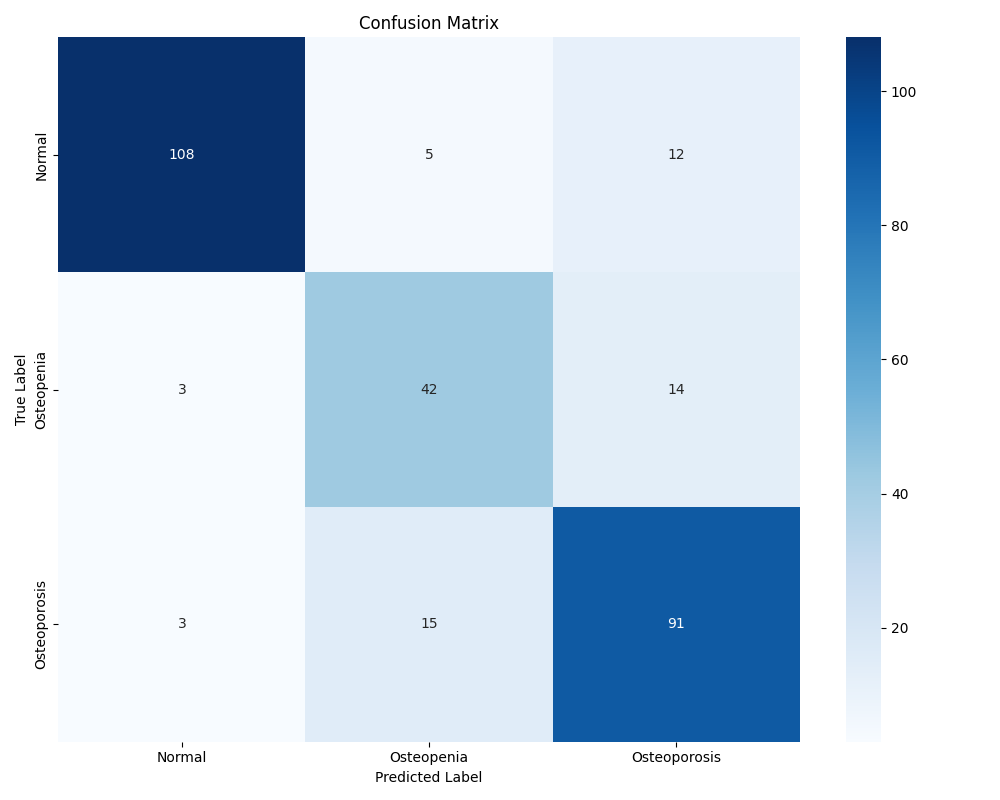

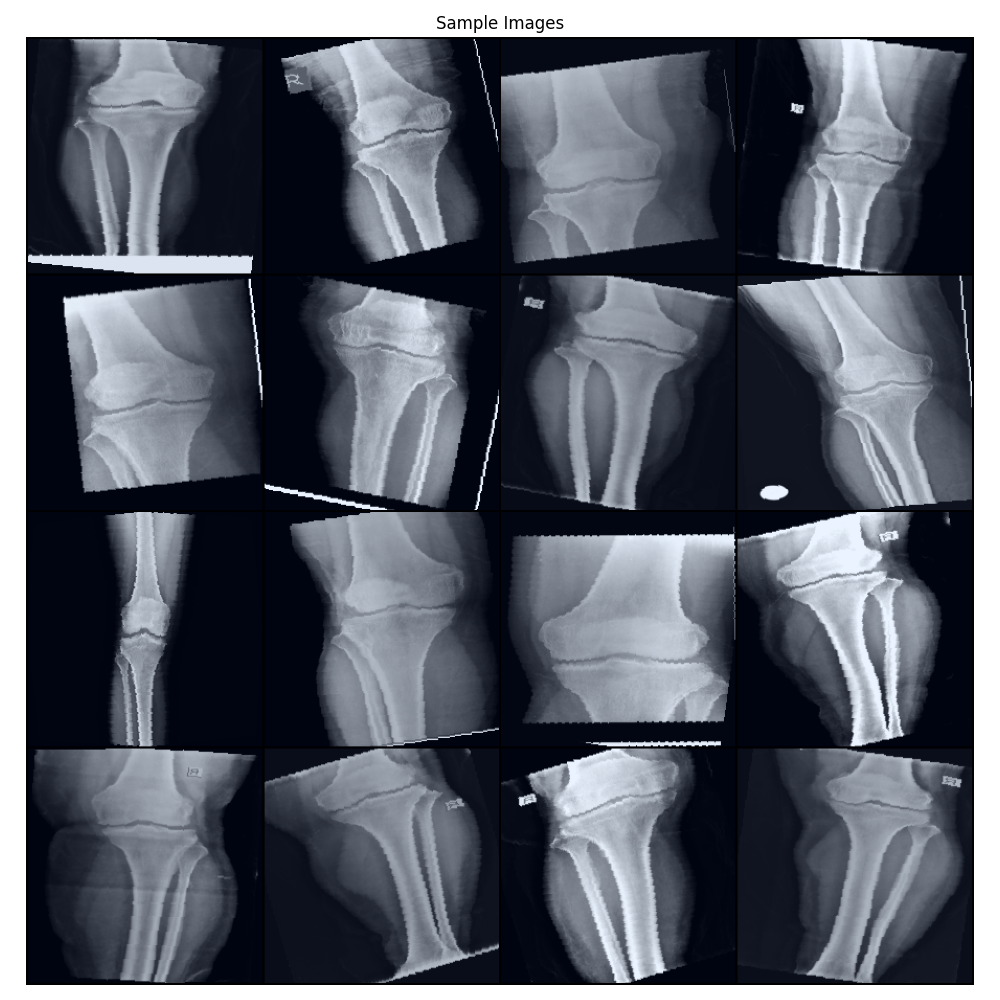

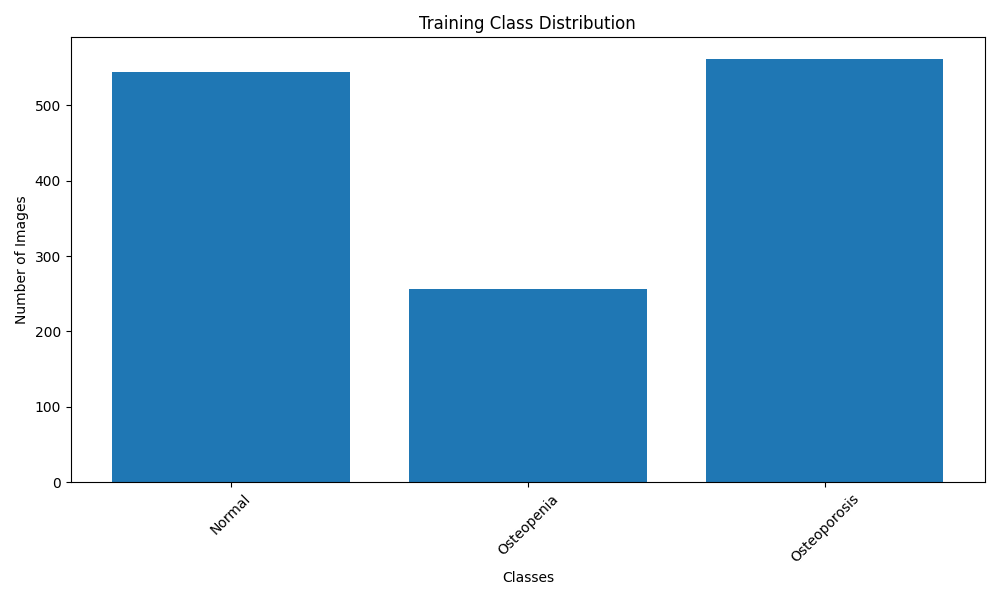

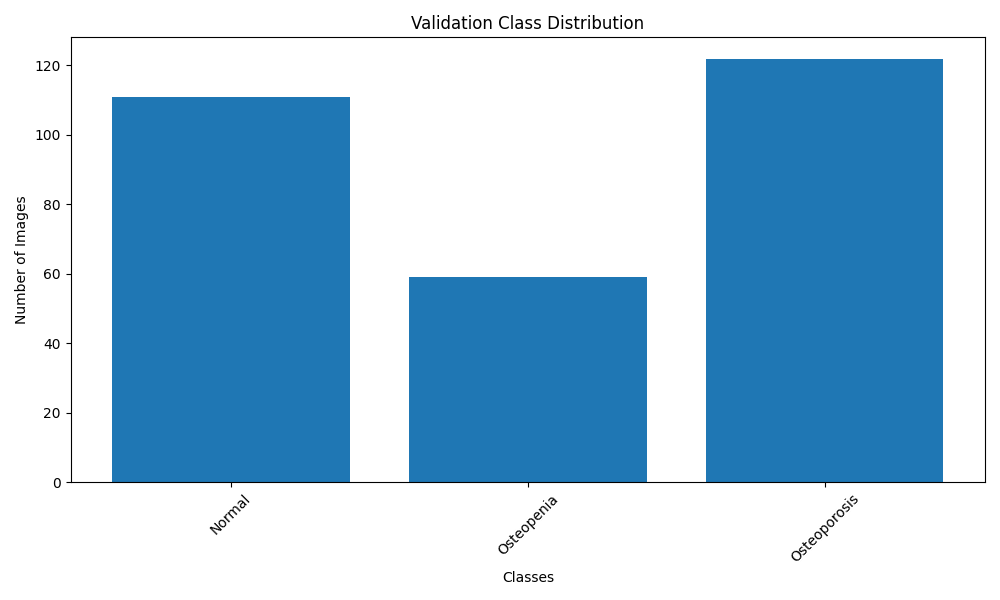

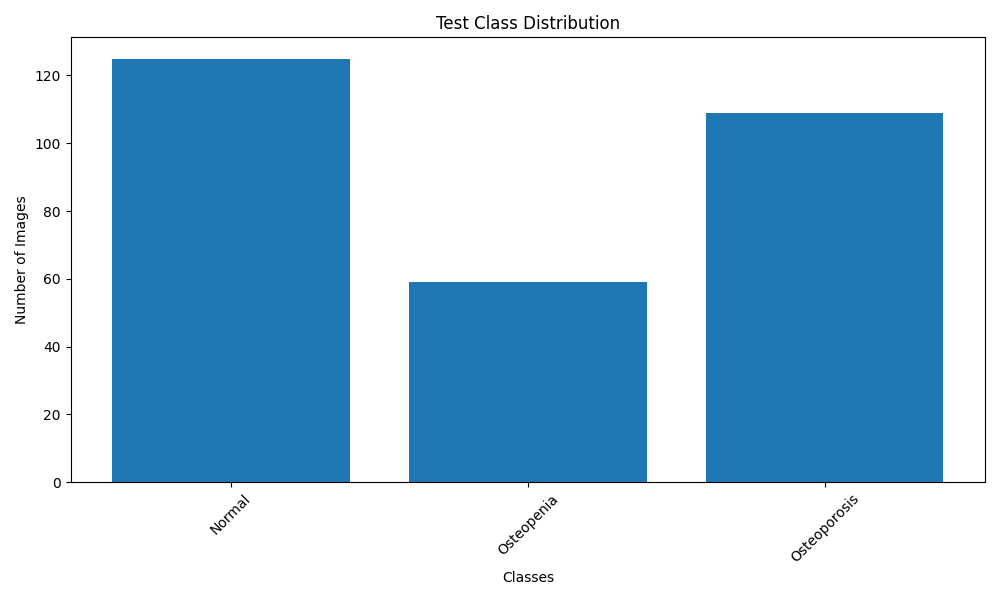

In [ ]:
from IPython.display import Image, display

# Display each image
display(Image(filename='confusion_matrix.png'))
display(Image(filename='image_grid.png'))
display(Image(filename='training_class_distribution.png'))
display(Image(filename='validation_class_distribution.png'))
display(Image(filename='test_class_distribution.png'))